In [50]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from bokeh.palettes import brewer
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import LabelSet, ColumnDataSource


output_notebook()

Loading BokehJS ...

In [36]:
# Load data
dfx = pd.read_excel('../data/raw/Распространенность.xlsx', header=1, index_col=0)

In [37]:
dfx.head(10)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,всего
показатель,,,,,,,,,,,
количество операций,85.000,120.000,350.000,540.000,552.000,668.000,606.000,645.000,697.000,650.000,4913.000
Евроскор (средний показатель),0.008,0.008,0.012,0.015,0.015,0.014,0.019,0.018,0.018,0.019,0.014
глубокая,3.000,3.000,1.000,5.000,5.000,7.000,6.000,3.000,7.000,2.000,42.000
поверхностная,NaN,3.000,5.000,8.000,9.000,15.000,12.000,17.000,19.000,15.000,103.000
нога,NaN,NaN,NaN,NaN,1.000,NaN,2.000,NaN,3.000,NaN,6.000
госпитальной ИОХВ всего,3.000,6.000,6.000,13.000,15.000,22.000,20.000,20.000,29.000,17.000,151.000
после выписки ИОХВ до 90 дней,0.000,3.000,1.000,5.000,8.000,11.000,10.000,10.000,16.000,5.000,69.000
всего,3.000,9.000,7.000,18.000,23.000,33.000,30.000,30.000,45.000,22.000,220.000


In [38]:
dfx_t = dfx.transpose().drop('всего')

In [39]:
dfx_t.fillna(0, inplace=True)

In [40]:
# using dictionary to convert specific columns 
convert_dict = {'количество операций': int, 
                'глубокая': int,
                'поверхностная': int,
                'нога': int,
                'госпитальной ИОХВ всего': int,
                'после выписки ИОХВ до 90 дней': int,
                'всего': int
            }
dfx_t = dfx_t.astype(convert_dict)

In [41]:
df = (dfx_t[[  'количество операций'
             , 'поверхностная'
             , 'нога'
             , 'глубокая'
             , 'после выписки ИОХВ до 90 дней'
             , 'всего'
            ]]
      .sort_values('количество операций')
     )


In [73]:
p = figure(x_range=(85, 697), y_range=(0, 50))
p.grid.minor_grid_line_color = '#eeeeee'

names = list(df.columns[1:5])
p.varea_stack(stackers=names, x='количество операций', color=brewer['Spectral'][10][0:4], 
              legend_label=names, source=df, alpha=0.9)

p.yaxis.axis_label = 'Количество осложнений'
p.xaxis.axis_label = 'Количество операций'

p.legend.location="top_left"

# reverse the legend entries to match the stacked order
p.legend.items.reverse()

right_side = ColumnDataSource(df[~df.index.isin([2015, 2018])])
left_side = ColumnDataSource(df[df.index.isin([2015, 2018])])

labels_right = LabelSet(x='количество операций', y='всего', text='index', level='annotation',
                        x_offset=0, y_offset=0, source=right_side, render_mode='canvas', text_font_size='8pt')

labels_left = LabelSet(x='количество операций', y='всего', text='index', level='annotation',
                        x_offset=-25, y_offset=0, source=left_side, render_mode='canvas', text_font_size='8pt')

p.add_layout(labels_right)
p.add_layout(labels_left)


show(p)

In [20]:
dfx_t.sort_values('количество операций')

показатель,количество операций,Евроскор (средний показатель),глубокая,поверхностная,нога,госпитальной ИОХВ всего,после выписки ИОХВ до 90 дней,всего
2010,85,0.008,3,0,0,3,0,3
2011,120,0.008,3,3,0,6,3,9
2012,350,0.012,1,5,0,6,1,7
2013,540,0.015,5,8,0,13,5,18
2014,552,0.015,5,9,1,15,8,23
2016,606,0.019,6,12,2,20,10,30
2017,645,0.018,3,17,0,20,10,30
2019,650,0.019,2,15,0,17,5,22
2015,668,0.014,7,15,0,22,11,33
2018,697,0.018,7,19,3,29,16,45


In [24]:
df = dfx_t.melt(id_vars=['количество операций'], 
                value_name = 'количество осложнений',
                value_vars=['глубокая', 'поверхностная', 'нога',  
                            'госпитальной ИОХВ всего', 'после выписки ИОХВ до 90 дней', 'всего'])

In [32]:
m = {'глубокая': 'госпитальная',
     'поверхностная': 'госпитальная',
     'нога': 'госпитальная',
     'госпитальной ИОХВ всего': 'госпитальная',
     'после выписки ИОХВ до 90 дней': 'после выписки',
     'всего': 'всего'
     }
df['Тип инфекции'] = df['показатель'].map(m)

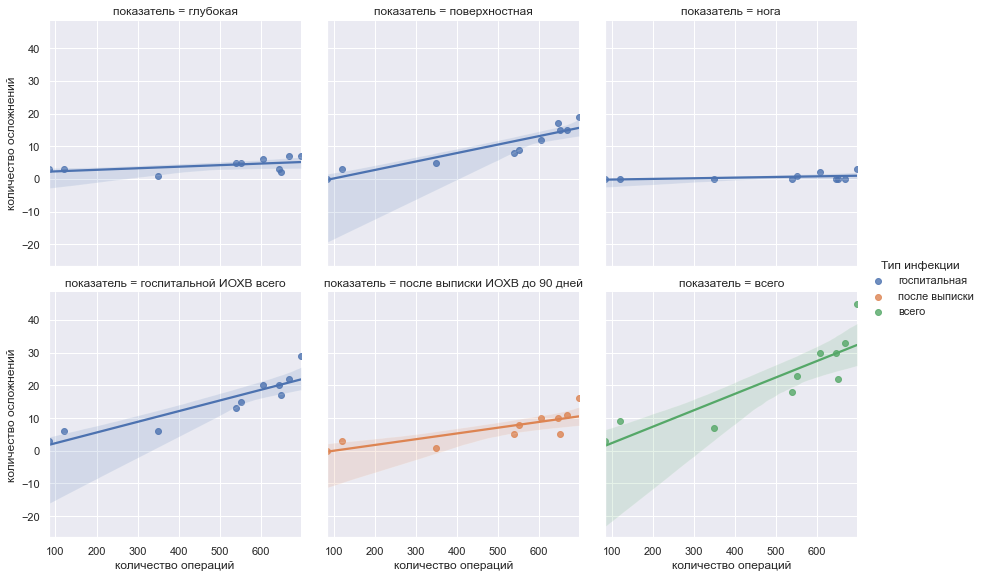

In [33]:
sns.set_theme(color_codes=True)

sns.lmplot(x='количество операций', y='количество осложнений', col='показатель', data=df, hue='Тип инфекции',
           col_wrap=3, height=4, order=1
          );

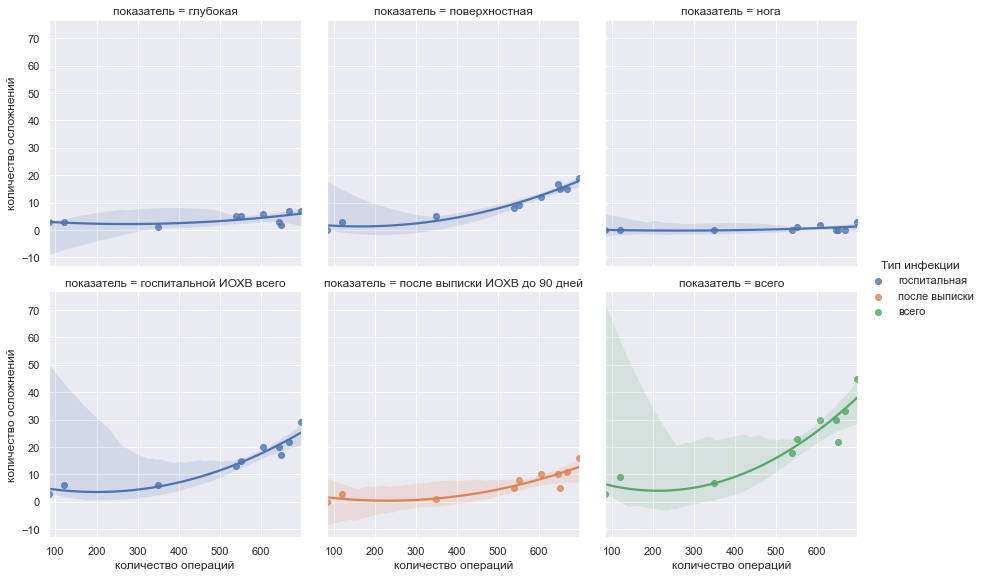

In [34]:
sns.set_theme(color_codes=True)

sns.lmplot(x='количество операций', y='количество осложнений', col='показатель', data=df, hue='Тип инфекции',
           col_wrap=3, height=4, order=2
          );